In [ ]:
import pandas as pd
import io

In [ ]:
from google.colab import files

upload = files.upload()

Saving churn.csv to churn.csv


In [ ]:
df = pd.read_csv(io.BytesIO(upload['churn.csv']))
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.shape

(10000, 14)

### Null values

In [ ]:
df.isnull().any()

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

### Data Cleaning

In [ ]:
print(df['HasCrCard'].unique())
print(df['IsActiveMember'].unique())

[1 0]
[1 0]


In [ ]:
df['IsActiveMember'].dtypes

dtype('int64')

In [ ]:
'''
"HasCrCard" and "IsActiveMember" are catgeorical in nature. But, represented as numeric.
'''
df['HasCrCard'] = df['HasCrCard'].apply(lambda x: 'Yes' if x==1 else 'No')
df['IsActiveMember'] = df['IsActiveMember'].apply(lambda x: 'Yes' if x==1 else 'No')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,Yes,Yes,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,No,Yes,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,Yes,No,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,No,No,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,Yes,Yes,79084.10,0



### Checking for Correlation

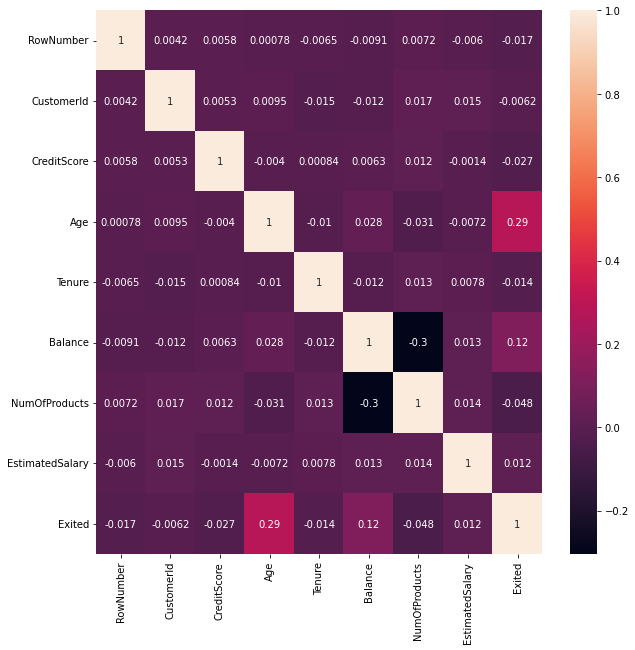

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,10))
import seaborn as sns
sns.heatmap(df.corr(),annot = True)

### Outliers

In [ ]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,199992.480000,1.000000


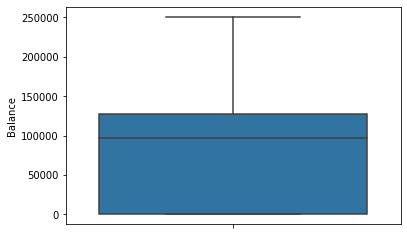

In [ ]:
sns.boxplot(y=df['Balance'])

### Data Pre Processing

In [ ]:
df_final = df.copy()

In [ ]:
X = df_final.iloc[:, 3:13]
y = df_final.iloc[:, 13]

In [ ]:
# Splitting the dataset into the Training and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
cat_train_col = X_train.columns[X_train.dtypes == 'object']
cat_train_col

Index(['Geography', 'Gender', 'HasCrCard', 'IsActiveMember'], dtype='object')

In [ ]:
X_train = pd.get_dummies(X_train, columns = cat_train_col, drop_first = True)
X_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male,HasCrCard_Yes,IsActiveMember_Yes
7389,667,34,5,0.00,2,163830.64,0,1,0,1,0
9275,427,42,1,75681.52,1,57098.00,1,0,1,1,1
2995,535,29,2,112367.34,1,185630.76,0,0,0,1,0
5316,654,40,5,105683.63,1,173617.09,0,1,1,1,0
356,850,57,8,126776.30,2,132298.49,0,1,0,1,1


In [ ]:
cat_test_col = X_test.columns[X_test.dtypes == 'object']
cat_test_coltuner.search(x_train, y_train, epochs=5, validation_data=(x_val, y_val))
best_model = tuner.get_best_models()[0]


Index(['Geography', 'Gender', 'HasCrCard', 'IsActiveMember'], dtype='object')

In [ ]:
X_test = pd.get_dummies(X_test, columns = cat_test_col, drop_first = True)
X_test.reindex(columns = X_train.columns, fill_value=0)
X_test.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male,HasCrCard_Yes,IsActiveMember_Yes
9394,597,35,8,131101.04,1,192852.67,1,0,0,1,1
898,523,40,2,102967.41,1,128702.10,0,0,0,1,0
2398,706,42,8,95386.82,1,75732.25,0,1,0,1,1
5906,788,32,4,112079.58,1,89368.59,0,0,1,0,0
2343,706,38,5,163034.82,2,135662.17,1,0,1,1,1


In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.activations import relu, sigmoid

def create_model(layers, activation):
  model = Sequential()
  for i, nodes in enumerate(layers):
    if i == 0:
      model.add(Dense(units=nodes, input_dim = X_train.shape[1], activation=activation))
      model.add(Dropout(0.2))
    else :
      model.add(Dense(units=nodes, activation=activation))
      model.add(Dropout(0.2))

  model.add(Dense(units=1, kernel_initializer='glorot_uniform', activation='sigmoid'))
  model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
  return model

model = KerasClassifier(build_fn=create_model, verbose=0)  

In [ ]:
layers = [[20], [40, 20], [45, 30, 15]]
activations = ['sigmoid', 'relu']
param_grid = dict(layers=layers, activation=activations, batch_size = [128, 256], epochs=[30])
gridSearch = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)

In [ ]:
grid_result = gridSearch.fit(X_train, y_train)

In [ ]:
[grid_result.best_score_,grid_result.best_params_]

[0.8585000038146973,
 {'activation': 'relu',
  'batch_size': 128,
  'epochs': 30,
  'layers': [45, 30, 15]}]

In [ ]:
pred_y = gridSearch.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
print(accuracy_score(y_test,pred_y))

0.8625


In [ ]:
print(classification_report(y_test,pred_y))

              precision    recall  f1-score   support

           0       0.88      0.95      0.92      1595
           1       0.73      0.50      0.60       405

    accuracy                           0.86      2000
   macro avg       0.81      0.73      0.76      2000
weighted avg       0.85      0.86      0.85      2000

